In [42]:
a_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
a_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(a_length), len(a_weight)

(35, 35)

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

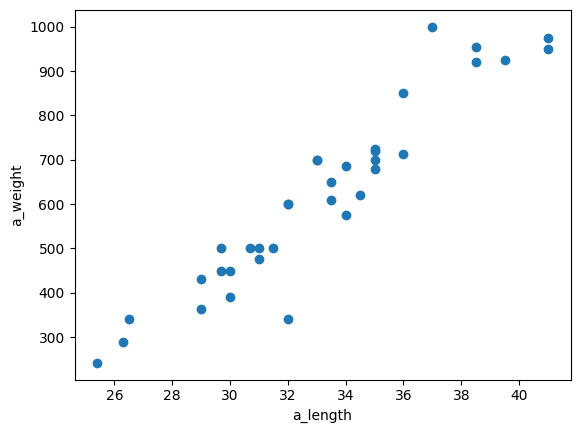

In [44]:
plt.scatter(a_length,a_weight)
plt.xlabel('a_length')
plt.ylabel('a_weight')
plt.show()

In [45]:
b_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
b_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

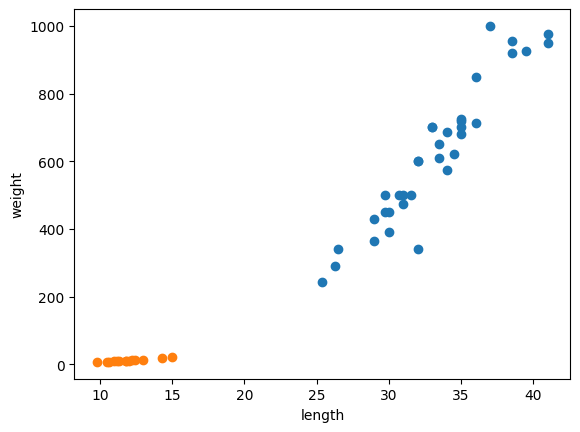

In [46]:
plt.scatter(a_length,a_weight)
plt.scatter(b_length,b_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
length = a_length + b_length
weight = a_weight + b_weight
len(length), len(weight)

(49, 49)

In [48]:
data =  [ [l,w]  for l,w in zip(length,weight)  ]
len(data)

49

In [49]:
target = [1]*len(a_length) + [0]*len(b_length)
print(target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
# 머신러닝 프로그램 - 사잇킷런
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier 는 클래임
# 머신러닝 적용 순서..
# 1. 모델선택(객체 생성)  - 회귀, 분류  - 적당한 한개를 우선 선택 - baseline
# 상황에 따라서 선택한 모델 대비 다른 모델을 선택해서 비교
# 2. 학습 - fit
# 3. 평가 - score
# 4. 적용(예측) - predict

In [51]:
# 1. 객체생성 - 모델선택  
kn =  KNeighborsClassifier(   )

In [52]:
# 2. 학습  지도학습(문제와 정답)
kn.fit(data,target)

KNeighborsClassifier()

In [53]:
kn.score(data,target)

1.0

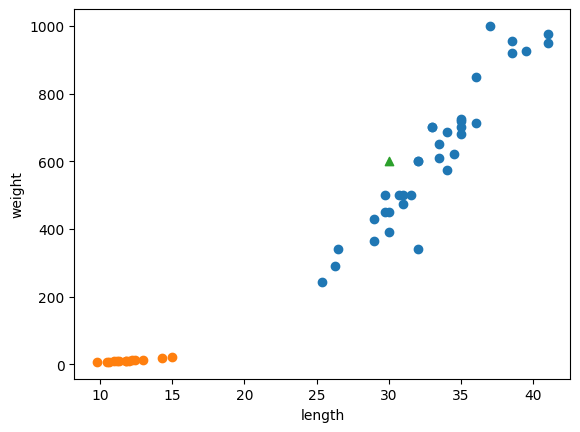

In [54]:
# 길이가 30이고 무게가 600 ? 어느 부류
plt.scatter(a_length,a_weight)
plt.scatter(b_length,b_weight)
plt.scatter(30,600,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
# 학습할때 데이터와 형태가 같아야 한다.
kn.predict( [[30, 600]] )

array([1])

In [56]:
# 학습할때.. k의 개수를 전체 데이터 개수로 설정해서 학습하고 위와 동일하게 30,600을 예측하면?

In [58]:
kn = KNeighborsClassifier(n_neighbors = len(data))

In [61]:
# 2 학습
kn.fit(data,target)
# 3 평가
kn.score(data,target)

0.7142857142857143

In [64]:
len(a_length) / len(data)

0.7142857142857143

In [65]:
# 이 모델에서는 항상 a 집합을 정답으로 평가

In [67]:
# 신뢰성?? 평가를 할때는.. 학습에 참여하지 않은 데이터로 평가를 해 보자
# 훈련 데이터와 평가용 데이터를 분할
train_input = data[:35]
train_target = target[:35]
test_input = data[35:]
test_target = target[35:]

In [68]:
kn = KNeighborsClassifier()

In [69]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [70]:
kn.score(test_input,test_target)

0.0

In [73]:
# 위에서는 데이터를 나눴는데. 한쪽으로 치우친 셈플링 편향
# 넘파이를 이용한 섞기
np_data = np.array(data)
np_target = np.array(target)

In [75]:
# 넘파이로 변환-> 데이터의 길이만큼 인덱스 리스트를만들어서.. 해당 인덱스를 섞어서 다시 넘파이에 대입

In [78]:
index = np.arange(len(data))
np.random.shuffle(index)
index

array([13, 19, 45, 12, 29, 16, 34, 36, 24, 28, 15, 46,  8,  4, 18, 32, 17,
       10, 35,  0,  1, 43, 39, 37, 20,  3, 42, 22, 23, 31, 30, 25, 11, 41,
        7, 26, 21,  6, 48, 33, 27,  2, 14, 40, 47,  5, 44, 38,  9])

In [80]:
# 훈련용 데이터 , 평가용 데이터 나누고
# 훈련용 데이터로 학습
# 평가용 데이터로 평가
train_index = index[:35]
target_index = index[35:]

In [81]:
train_data = np_data[train_index]
train_target = np_target[train_index]
test_data = np_data[target_index]
test_target = np_target[target_index]

In [82]:
kn = KNeighborsClassifier()
kn.fit(train_data,train_target)
kn.score(test_data,test_target)

1.0

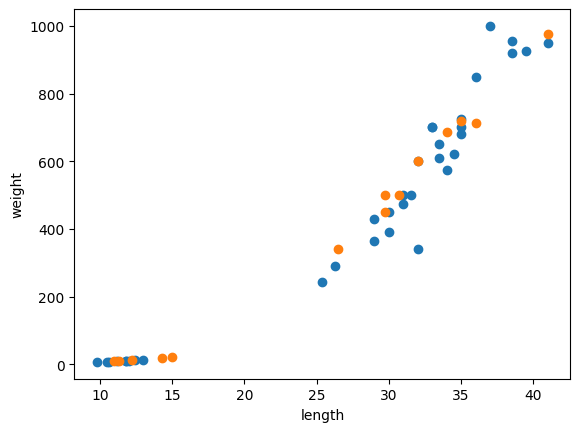

In [96]:
plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(test_data[:,0],test_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [97]:
# 데이터를 적절하게 섞어서 훈련용과 테스트용 데이터에 편향 되는 형상을 방지

In [106]:
# 데이터를 훈련용과 평가용으로 분리할때 사용할수 있는 편리한 라이브러리
# 데이터가 리스트로 존재
# 넘파이형태로 변환-->추천
data = np.column_stack((length,weight))
target = np.concatenate( (np.ones(35), np.zeros(14)  ))

In [119]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state=0)

In [128]:
len(x_train), len(x_test), len(y_train), len(y_test)

(36, 13, 36, 13)

In [129]:
# 모델->학습->평가
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

1.0

In [130]:
# 길이가 25 무게가 150인 데이터는 어느부류일까?
kn.predict([[25,150]])

array([0.])

In [131]:
# 이웃의 좌표와 거리
distance, indexes =  kn.kneighbors([[25,150]])
distance, indexes
x_train[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 13. ,  12.2]]])

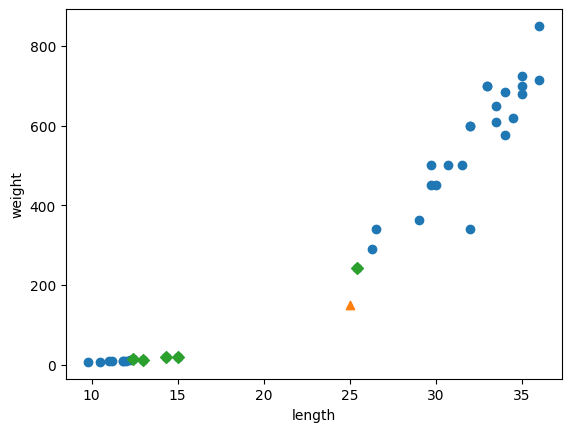

In [132]:
plt.scatter(x_train[:,0], x_train[:,1]) # 길이와 무게
plt.scatter(25,150,marker='^')
plt.scatter(x_train[indexes,0],x_train[indexes,1], marker='D' )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

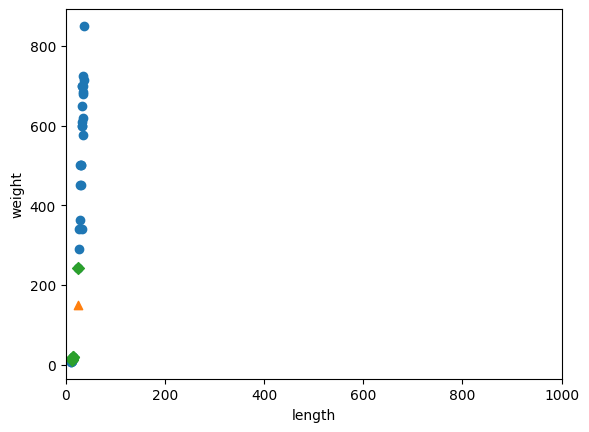

In [133]:
plt.scatter(x_train[:,0], x_train[:,1]) # 길이와 무게
plt.scatter(25,150,marker='^')
plt.scatter(x_train[indexes,0],x_train[indexes,1], marker='D' )
plt.xlim( (0,1000) )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [134]:
# 표준점수로 맞춘다 or scaling  ->데이터의 특성은 유지하면서 전체 데이터의 크기를 맞춘다
# 평균과 표준편차를이용한다.
# (각 데이터에서 - 평균)/표준편차
# 평균은0 표준편차는 1인 상태로 변경

In [149]:
x_train[:5]

array([[ 36. , 714. ],
       [ 15. ,  19.9],
       [ 26.5, 340. ],
       [ 13. ,  12.2],
       [ 33.5, 610. ]])

In [150]:
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
mean,std

(array([ 25.34166667, 375.68888889]), array([  9.71806379, 287.25393216]))

In [151]:
x_train_scaled =  (x_train-mean) / std
x_train_scaled[:5]

array([[ 1.09675482,  1.17774232],
       [-1.06416946, -1.23858666],
       [ 0.11919384, -0.1242416 ],
       [-1.26997177, -1.26539221],
       [ 0.83950193,  0.81569331]])

In [152]:
predict_scaled = ([25,150] - mean) / std
predict_scaled

array([-0.0351579 , -0.78567728])

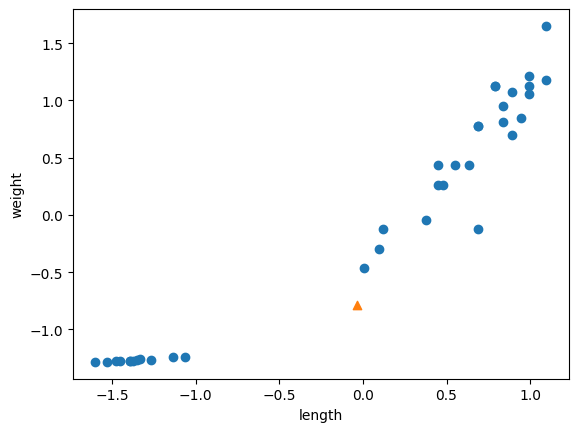

In [153]:
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1]) # 길이와 무게
plt.scatter(predict_scaled[0],predict_scaled[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 스케일된 데이터를 가지고  학습
# 시각화
# 예측 (25,150)

In [154]:
predict_scaled

array([-0.0351579 , -0.78567728])

In [155]:
kn = KNeighborsClassifier()
kn.fit(x_train_scaled,y_train)
kn.predict([predict_scaled])

array([1.])

In [156]:
distance,indexes = kn.kneighbors([predict_scaled])
distance,indexes

(array([[0.32290818, 0.50539875, 0.67920661, 0.84808423, 0.97792684]]),
 array([[33, 20,  2, 32, 13]]))

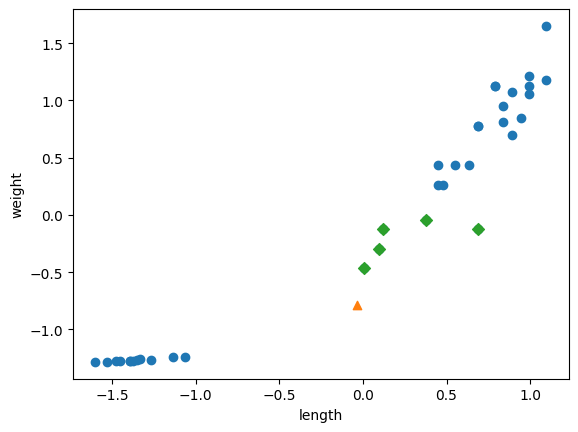

In [157]:
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1]) # 길이와 무게
plt.scatter(predict_scaled[0],predict_scaled[1],marker='^')
plt.scatter(x_train_scaled[indexes,0],x_train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()